**1**. (25 points)

The Collatz sequence is defined by the following rules for finding the next number
```
if the current number is even, divide by 2
if the current number is odd, multiply by 3 and add 1
if the current number is 1, stop
```
- Find the starting number and length of the longest Collatz sequence for starting integers in `range(1, 10001)` (15 points)
- Make a scatter plot of the sequence length against starting number for starting integers in `range(1, 10001)`. Use a size of 1 (s=1) in the argument to scatter function. (10 points)

Note: The Collatz sequence is only for positive integers. For example, if the starting number is 3, the collatz sequence is `[3, 10, 5, 16, 8, 4, 2, 1]`.

In [3]:
def collatz(n):
    """Collatz seqeunce starting wtih n."""

    seq = [n]
    while n != 1:
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3*n + 1
        seq.append(n)
    return seq

In [4]:
collatz(3)

[3, 10, 5, 16, 8, 4, 2, 1]

In [9]:
def collatz_r(n, acc=[]):
    """Recursive version of Collatz sequence generator."""
    acc.append(n)
    if n == 1:
        return acc
    elif n % 2 == 0:
        return collatz_r(n //2, acc)
    else:
        return collatz_r(3*n+1, acc)        

In [10]:
collatz_r(3)

[3, 10, 5, 16, 8, 4, 2, 1]

In [5]:
ns = range(1, 10001)
seqs = {n: collatz(n) for n in ns}

In [6]:
n, seq = max(seqs.items(), key=lambda x: len(x[1]))
n, len(seq)

(6171, 262)

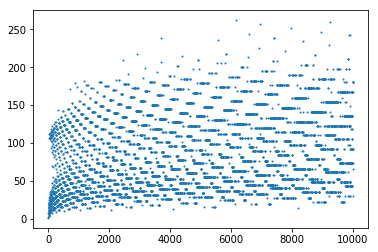

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

xs, ys = seqs.keys(), list(map(len, seqs.values()))
plt.scatter(xs, ys, s=1)
pass

**2**. (25 points)

The Newton-Rephson algorithm finds zeros of a function using the update

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

- Use the Newton-Raphson algorithm to find all solutions to $x^3 = 1$. Use $2, -2+3i, -2-3i$ as the starting conditions. You can use a brute force function that always terminates after 100 iterations. (15 points)
- Find the solutions by finding the companion matrix and performing an eigendecomposition. (10 points)

Note: Python uses $j$ for the imaginary part, not $i$

In [6]:
f = lambda x: x**3  - 1
fprime = lambda x: 3*x**2

def newton_raphson(x, f, fprime, n_iter=100):
    """Newton-Raphson algorithm."""
    
    for i in range(n_iter):
        x -= f(x)/fprime(x)
    return x

In [7]:
newton_raphson(2, f, fprime)

1.0

In [8]:
newton_raphson(-2+3j, f, fprime)

(-0.5+0.8660254037844386j)

In [9]:
newton_raphson(-2-3j, f, fprime)

(-0.5-0.8660254037844386j)

In [10]:
import numpy as np

In [11]:
A = np.array([
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0]
])

In [12]:
np.linalg.eigvals(A)

array([-0.5+0.8660254j, -0.5-0.8660254j,  1. +0.j       ])

**3**. (20 points)

You are given the following data

```python
A = np.array([[1, 8, 0, 7],
       [0, 2, 9, 4],
       [2, 8, 8, 3],
       [4, 8, 6, 1],
       [2, 1, 9, 6],
       [0, 7, 0, 1],
       [4, 0, 2, 4],
       [1, 4, 9, 5],
       [6, 2, 6, 6],
       [9, 9, 6, 3]], dtype='float')

b = np.array([[2],
       [5],
       [0],
       [0],
       [6],
       [7],
       [2],
       [6],
       [7],
       [9]], dtype='float')
```

- Using SVD directly (not via `lstsq`), find the least squares solution to $Ax = b$ (10 points)
- Use SVE to find the best rank 3 approximation of A (10 points)
- Calculate the approximation error in terms of the Frobenius norm (5 points)

In [13]:
A = np.array([[1, 8, 0, 7],
       [0, 2, 9, 4],
       [2, 8, 8, 3],
       [4, 8, 6, 1],
       [2, 1, 9, 6],
       [0, 7, 0, 1],
       [4, 0, 2, 4],
       [1, 4, 9, 5],
       [6, 2, 6, 6],
       [9, 9, 6, 3]], dtype='float')

b = np.array([[2],
       [5],
       [0],
       [0],
       [6],
       [7],
       [2],
       [6],
       [7],
       [9]], dtype='float')

In [14]:
U, s, Vt = np.linalg.svd(A, full_matrices=False)

In [15]:
Vt

array([[-0.34013188, -0.54411494, -0.64303249, -0.41804121],
       [-0.14436593, -0.76637649,  0.59128419,  0.20544723],
       [ 0.89659604, -0.33958483, -0.26064166,  0.11341786],
       [-0.24409901, -0.03589085, -0.41104519,  0.87759294]])

In [16]:
Vt.T @ np.diag(1/s) @ U.T @ b

array([[0.38618578],
       [0.06537436],
       [0.15871679],
       [0.47146163]])

In [17]:
k = 3
R = U[:, :k] @ np.diag(s[:k]) @ Vt[:k, :]

In [18]:
R

array([[ 2.36986528,  8.20141674,  2.30675469,  2.07501439],
       [-0.06366508,  1.99063907,  8.89279258,  4.22889083],
       [ 1.6507169 ,  7.94864352,  7.41183237,  4.25575431],
       [ 3.30378057,  7.89763209,  4.8276165 ,  3.50307147],
       [ 2.25436632,  1.03740049,  9.42833461,  5.08549366],
       [ 0.15289312,  7.02248048,  0.25746103,  0.45031351],
       [ 4.41786952,  0.06144102,  2.70366224,  2.49766148],
       [ 1.07344832,  4.0107994 ,  9.1236817 ,  4.73593613],
       [ 6.30827527,  2.04532694,  6.5191134 ,  4.89167841],
       [ 8.42553715,  8.91553444,  5.03264584,  5.06532811]])

In [19]:
np.linalg.norm(A - R, ord='fro')

7.305957727532788

**4**. (25 points)

We observe some data points $(x_i, y_i)$, and believe that an appropriate model for the data is that

$$
f(x) = b_0 + b_1 x + b_2 x^2
$$

with some added noise. 

- Find optimal values of the parameters $\beta = (b_0, b_1, b_2)$ that minimize $\Vert y - f(x) \Vert^2$ using gradient descent and starting with an initial value of $\beta_0 = \begin{bmatrix}1 & 1 &1 \end{bmatrix}$. Use a learning rate of 0.0001 and 10,000 iterations (20 points)
- Plot the fitted quadratic together with the data points (5 points)

Remember to use column vectors for $x$ and $y$.

Data
```
x = np.array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])
y = np.array([[  4.70612107],
       [  4.63393704],
       [  6.49770138],
       [ 12.11243273],
       [ 20.51575619],
       [ 34.23493694],
       [ 53.1814074 ],
       [ 74.20612958],
       [101.24176654],
       [131.85009012]])
```

In [25]:
def grad(beta, A, y):
    """Gradient."""
    
    return A.T@A@beta - A.T@y

In [26]:
def gd(beta, x, y, a=0.0001, n_iter=10000):
    """Gradient descent."""
    
    X = np.c_[np.ones(len(x)), x, x**2]

    for i in range(n_iter):
        beta -= a*grad(beta, X, y)
    return beta

In [27]:
x = np.array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])
y = np.array([[  4.70612107],
       [  4.63393704],
       [  6.49770138],
       [ 12.11243273],
       [ 20.51575619],
       [ 34.23493694],
       [ 53.1814074 ],
       [ 74.20612958],
       [101.24176654],
       [131.85009012]])

In [28]:
beta0 = np.ones((3,1))
beta = gd(beta0, x, y)

In [29]:
beta

array([[ 4.4403381 ],
       [-3.61299128],
       [ 1.96207164]])

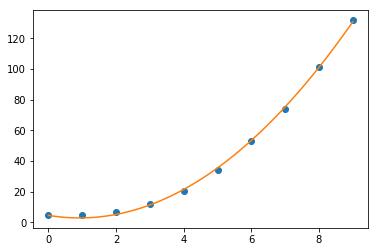

In [30]:
m = 100
xp = np.linspace(min(x), max(x), m).reshape(-1,1)
X = np.c_[np.ones(m), xp, xp**2]
yp = X@beta
plt.plot(x, y, 'o')
plt.plot(xp, yp)
pass

**5**. (25 points)

Recall that the page rank of a node is given by the equation

![i1](https://wikimedia.org/api/rest_v1/media/math/render/svg/6bb0f1469218a064274fd4691143e9ce64639dc2)

and at steady state, we have the page rank vector $R$

![i3](https://wikimedia.org/api/rest_v1/media/math/render/svg/65d2fed50688deaca4640b117c88a9e7a3c2ef0d)

where $d$ is the damping factor, $N$ is the number of nodes, $1$ is a vector of ones, and 

![i2.5](https://wikimedia.org/api/rest_v1/media/math/render/svg/3e82b446a376633a386b10668703a4547f167d1c)

where $L(p_j)$ is the number of outgoing links from node $p_j$.

Consider the graph

![i0](data/pagerank.png)

If $d = 0.9$ find the page rank of each node

- By solving a linear system (15 points)
- By eigendecomposition (10 points)

Note: The Markov matrix constructed as instructed does not follow the usual convention. Here the columns of our Markov matrix are probability vectors, and the page rank is considered to be a column vector of the steady state probabilities.

In [20]:
M = np.array([
    [0,0,0,1],
    [0.5,0,0,0],
    [0.5,1,0,0],
    [0,0,1,0]
])

In [21]:
N = 4
d = 0.9
r = np.linalg.solve(np.eye(N) - d*M, (1-d)/N * np.ones(N))
r

array([0.27963897, 0.15083753, 0.28659132, 0.28293218])

In [22]:
A = d*M + (1-d)/N * np.ones(N)

e, v = np.linalg.eig(A)

In [23]:
e

array([ 1.        +0.j        , -0.15849051+0.77464496j,
       -0.15849051-0.77464496j, -0.58301898+0.j        ])

In [24]:
u = np.real_if_close(v[:, 0])
u /= np.sum(u)
u

array([0.27963897, 0.15083753, 0.28659132, 0.28293218])